## Import Library yg dibutuhkan

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
warnings.filterwarnings("ignore")
%matplotlib inline
#tambahkan library sesuai kebutuhan

In [2]:
data = pd.read_csv('activity_km_07_01.csv')

In [3]:
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [4]:
#isi code
data = data.rename(columns={'intensitas air':'intensitas_air', 'tinggi air':'tinggi_air'})
data.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [5]:
#Isi Code
print(data['cahaya'].value_counts())
print(data['intensitas_air'].value_counts())
print(data['aksi'].value_counts())

Ada          302
Tidak ada    288
Name: cahaya, dtype: int64
Tinggi           154
Rendah           154
Rendah sekali    154
Cukup            154
Name: intensitas_air, dtype: int64
Tidak melakukan apa-apa                 473
Hidupkan Lampu                           92
Hidupkan Lampu dan Pompa nutrisi TDS     39
Hidupkan Pompa nutrisi TDS               12
Name: aksi, dtype: int64


In [6]:
data['cahaya'] = data['cahaya'].map({'Ada' : 1, 
                                     'Tidak ada' : 0})

data['intensitas_air'] = data['intensitas_air'].map({'Rendah sekali' : 0,
                                                     'Rendah' : 1,
                                                     'Cukup' : 2,
                                                     'Tinggi' : 3})

data['aksi'] = data['aksi'].map({'Tidak melakukan apa-apa' : 0,
                                 'Hidupkan Lampu' : 1,
                                 'Hidupkan Pompa nutrisi TDS' : 2,
                                 'Hidupkan Lampu dan Pompa nutrisi TDS' : 3})
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,3
1,5.7,1.0,3,26.9,79.0,557,3
2,6.0,1.0,3,27.0,11.0,491,3
3,6.5,1.0,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0
...,...,...,...,...,...,...,...
611,4.6,1.0,0,25.3,904.0,47,1
612,2.1,1.0,0,25.0,388.0,18,3
613,3.2,1.0,0,25.3,793.0,19,1
614,1.4,1.0,0,25.4,1052.0,3,1


## 3. Handle Missing Value

In [7]:
#Isi Code
data.isna().sum()

PH                16
cahaya            26
intensitas_air     0
suhu              27
PPM                5
tinggi_air         0
aksi               0
dtype: int64

In [8]:
data['PH'].fillna(data['PH'].mean(), inplace=True)
data['suhu'].fillna(data['suhu'].mean(), inplace=True)
data['PPM'].fillna(data['PPM'].mean(), inplace=True)

In [9]:
data['cahaya'].mode()

0    1.0
dtype: float64

In [10]:
data['cahaya'].fillna(1.0, inplace=True)

In [11]:
data.isna().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [12]:
#Isi Code
cols = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air']
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
  data_outlier[col] = detect_outliers_zscore(data[col])
  print("Outliers from Z-scores method (", col, ")", len(data_outlier[col]), "outlier :", data_outlier[col])

Outliers from Z-scores method ( PH ) 0 outlier : []
Outliers from Z-scores method ( cahaya ) 0 outlier : []
Outliers from Z-scores method ( intensitas_air ) 0 outlier : []
Outliers from Z-scores method ( suhu ) 2 outlier : [-300.0, -100.0]
Outliers from Z-scores method ( PPM ) 0 outlier : []
Outliers from Z-scores method ( tinggi_air ) 2 outlier : [12000, 9000]


In [13]:
mean_suhu = data['suhu'].mean()
mode_tinggi_air = data['tinggi_air'].mode()

In [14]:
for i in data_outlier['suhu']:
  data['suhu'] = np.where(data['suhu']==i, mean_suhu, data['suhu'])

In [15]:
for i in data_outlier['tinggi_air']:
  data['tinggi_air'] = np.where(data['tinggi_air']==i, mode_tinggi_air, data['tinggi_air'])

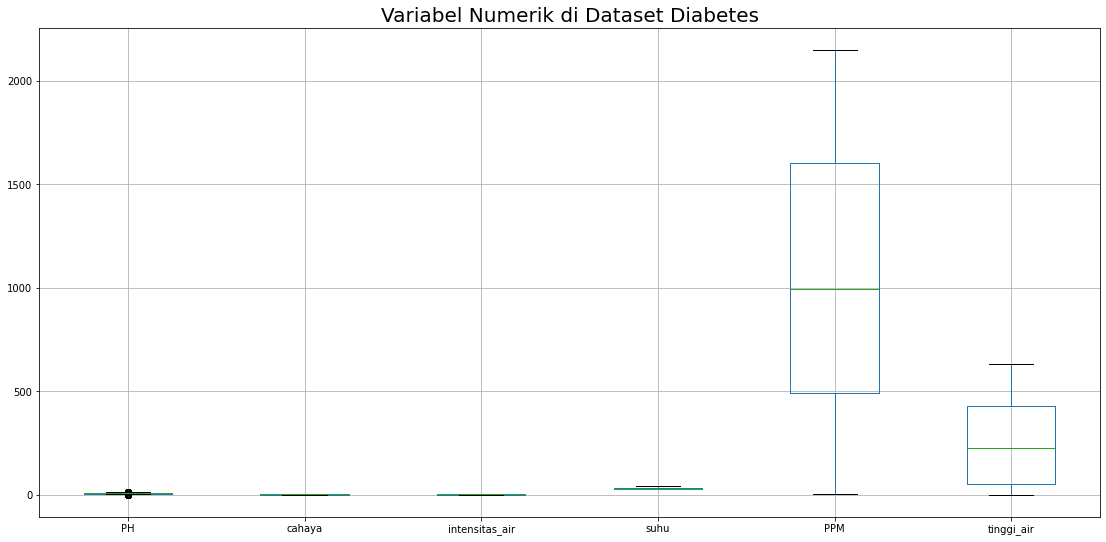

In [16]:
plt.figure(figsize=(19,9))
data[cols].boxplot()
plt.title("Variabel Numerik di Dataset Diabetes", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [17]:
#Isi Code
X = data[cols]
y = data['aksi']

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [18]:
#pip install imbalanced-learn
!pip install imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
#Isi Code
y.value_counts()

0    473
1     92
3     39
2     12
Name: aksi, dtype: int64

In [21]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 473), (1, 473), (2, 473), (3, 473)]


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

In [22]:
#Isi Code
import matplotlib.pyplot as plt

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [23]:
#Isi Kode
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X_resampled)
print(X_scaled)

[[0.46428571 1.         1.         0.12820513 0.08705773 0.98887122]
 [0.40714286 1.         1.         0.12179487 0.03631285 0.88553259]
 [0.42857143 1.         1.         0.12820513 0.00465549 0.78060413]
 ...
 [0.78608611 1.         0.66666667 0.09817937 0.03567426 0.46948335]
 [0.77875361 1.         0.66666667 0.10037285 0.03296611 0.43901872]
 [0.55364753 1.         0.14548126 0.1226097  0.19080921 0.39577885]]


## 9. Buat model ANN

In [24]:
#Isi Code
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
n_features = X_train.shape[1]

(1513, 6) (379, 6) (1513,) (379,)


In [25]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu',))
model.add(Dense(4, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=60, batch_size=32, verbose=0)

In [28]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0,validation_split=0.2)

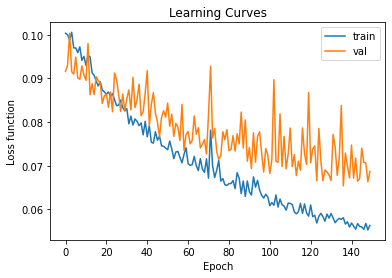

In [29]:
from matplotlib import pyplot
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss function')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [30]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.979


In [34]:
model.save('model_ANN_fix.h5')

## 10. Build Model KNN

In [102]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [103]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [104]:
cm_train=confusion_matrix(y_train, y_train_pred)
cm_test=confusion_matrix(y_test, y_test_pred)

In [105]:
def roc_curve_func(y_true,y_score):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  roc_auc = roc_auc_score(y_true, y_score)

  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")

In [106]:
y_train_pred=model.predict(X_train)
y_train_pred_proba=model.predict_proba(X_train)[:,1]

cm_train=confusion_matrix(y_train, y_train_pred)

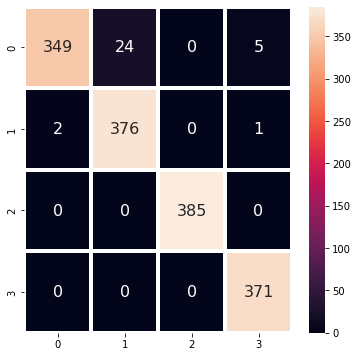

In [107]:
plt.figure(figsize=(6,6))
sns.heatmap(cm_train,annot=True,fmt=',.0f',linewidths=3, annot_kws={"fontsize":16})

In [108]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        95
           1       0.82      0.98      0.89        94
           2       1.00      1.00      1.00        88
           3       0.86      1.00      0.93       102

    accuracy                           0.91       379
   macro avg       0.92      0.91      0.90       379
weighted avg       0.92      0.91      0.90       379



In [109]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [110]:
cm_train=confusion_matrix(y_train, y_train_pred)
cm_test=confusion_matrix(y_test, y_test_pred)

In [111]:
def basic_eval(tm,cm):
  plt.figure(figsize=(6,6))
  plt.title(tm+" Evaluation")
  sns.heatmap(cm,annot=True,fmt=',.0f',linewidths=3, annot_kws={"fontsize":16})

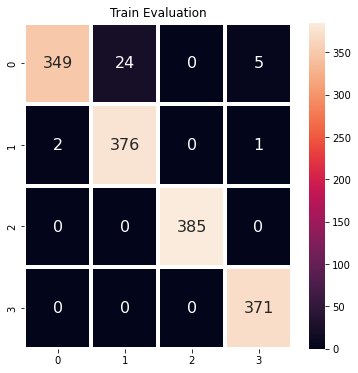

In [112]:
basic_eval('Train',cm_train)

In [113]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       378
           1       0.94      0.99      0.97       379
           2       1.00      1.00      1.00       385
           3       0.98      1.00      0.99       371

    accuracy                           0.98      1513
   macro avg       0.98      0.98      0.98      1513
weighted avg       0.98      0.98      0.98      1513



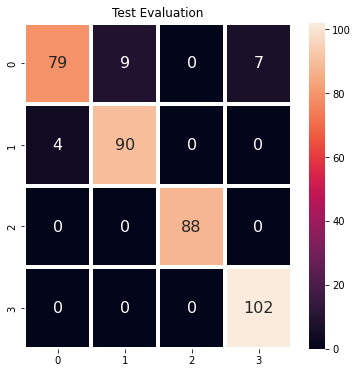

In [114]:
basic_eval('Test',cm_test)

In [115]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        95
           1       0.91      0.96      0.93        94
           2       1.00      1.00      1.00        88
           3       0.94      1.00      0.97       102

    accuracy                           0.95       379
   macro avg       0.95      0.95      0.95       379
weighted avg       0.95      0.95      0.95       379



In [116]:

error = []
iterasi = 10
# Menghitung eror dari K antara 1-40 
for i in range(1, iterasi):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

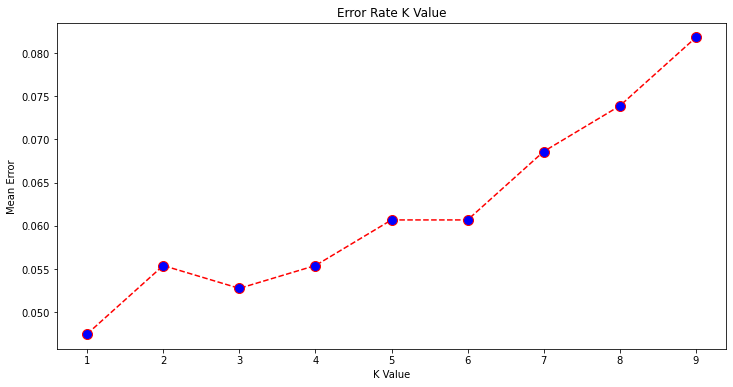

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, iterasi), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [119]:
from sklearn.externals import joblib 

In [120]:
joblib.dump(model, 'Model_KNN.pkl') 

['Model_KNN.pkl']

In [ ]:
# Load the model from the file 
# knn_from_joblib = joblib.load('filename.pkl')  
  
# Use the loaded model to make predictions 
# knn_from_joblib.predict(X_test)